In [9]:
import pandas as pd
from pathlib import Path
from cartilage_thickness_collection import get_cartilage_thickness_runs_file_path

In [27]:
runs_file = get_cartilage_thickness_runs_file_path()
runs = pd.read_parquet(runs_file)

unique_computed_files_dir = runs.drop_duplicates(subset='computed_files_dir', keep='last')['computed_files_dir'].tolist()
unique_parents = list(dict.fromkeys(reversed([Path(dir).parent for dir in unique_computed_files_dir])))
print(unique_parents)
parent_child_dirs = [(parent, list(parent.glob('*'))) for parent in unique_parents]
print(parent_child_dirs)
studies = parent_child_dirs[:20]
image_file_name = "FC_thickness.png"

[PosixPath('/mnt/cybertron-oai/paul-scratch/collections/oai/9000798/OAI^MR^24 MONTH^LEFT-1.3.6.1.4.1.21767.172.16.9.194.1169599504.4700.0/cartilage_thickness'), PosixPath('/mnt/cybertron-oai/paul-scratch/collections/oai/9000798/OAI^MR^24 MONTH^RIGHT -1.3.6.1.4.1.21767.172.16.9.194.1169599504.4701.0/cartilage_thickness'), PosixPath('/mnt/cybertron-oai/paul-scratch/collections/oai/9007827/OAI^MR^ENROLLMENT^RIGHT -1.3.12.2.1107.5.2.13.20576.4.0.8556380413102163/cartilage_thickness'), PosixPath('/mnt/cybertron-oai/paul-scratch/collections/oai/9007827/OAI^MR^ENROLLMENT^LEFT-1.3.12.2.1107.5.2.13.20576.4.0.8556409114512523/cartilage_thickness'), PosixPath('/mnt/cybertron-oai/paul-scratch/collections/oai/9000798/OAI^MR^ENROLLMENT^LEFT-1.3.12.2.1107.5.2.13.20576.4.0.8047887714483085/cartilage_thickness'), PosixPath('/mnt/cybertron-oai/paul-scratch/collections/oai/9007827/OAI^MR^96 MONTH^RIGHT -1.3.6.1.4.1.21767.172.16.11.7.1385496118.2.0/cartilage_thickness'), PosixPath('/mnt/cybertron-oai/paul


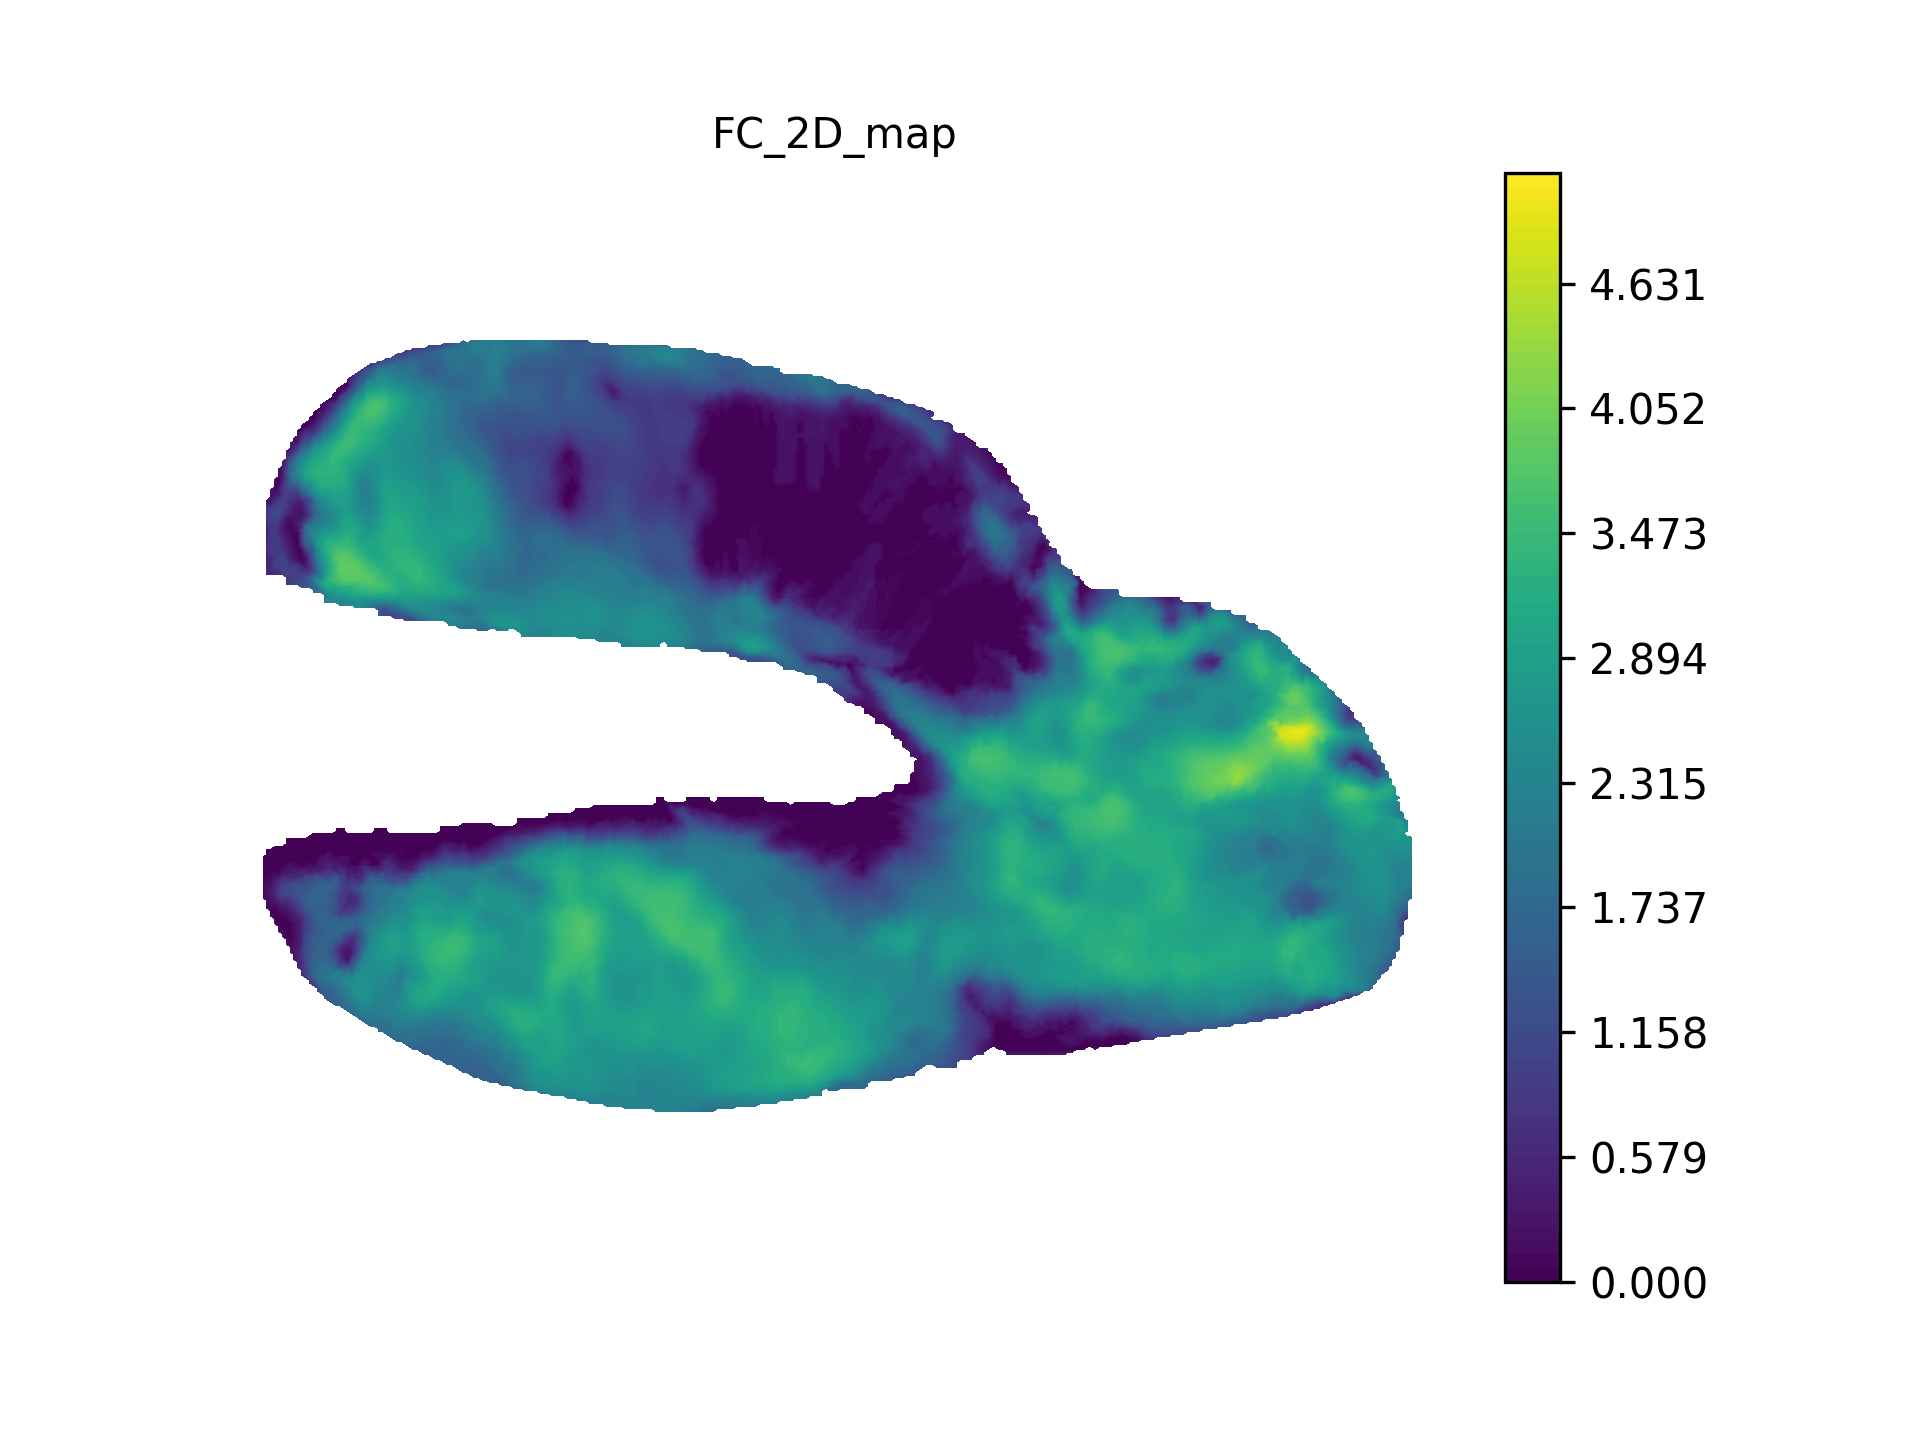


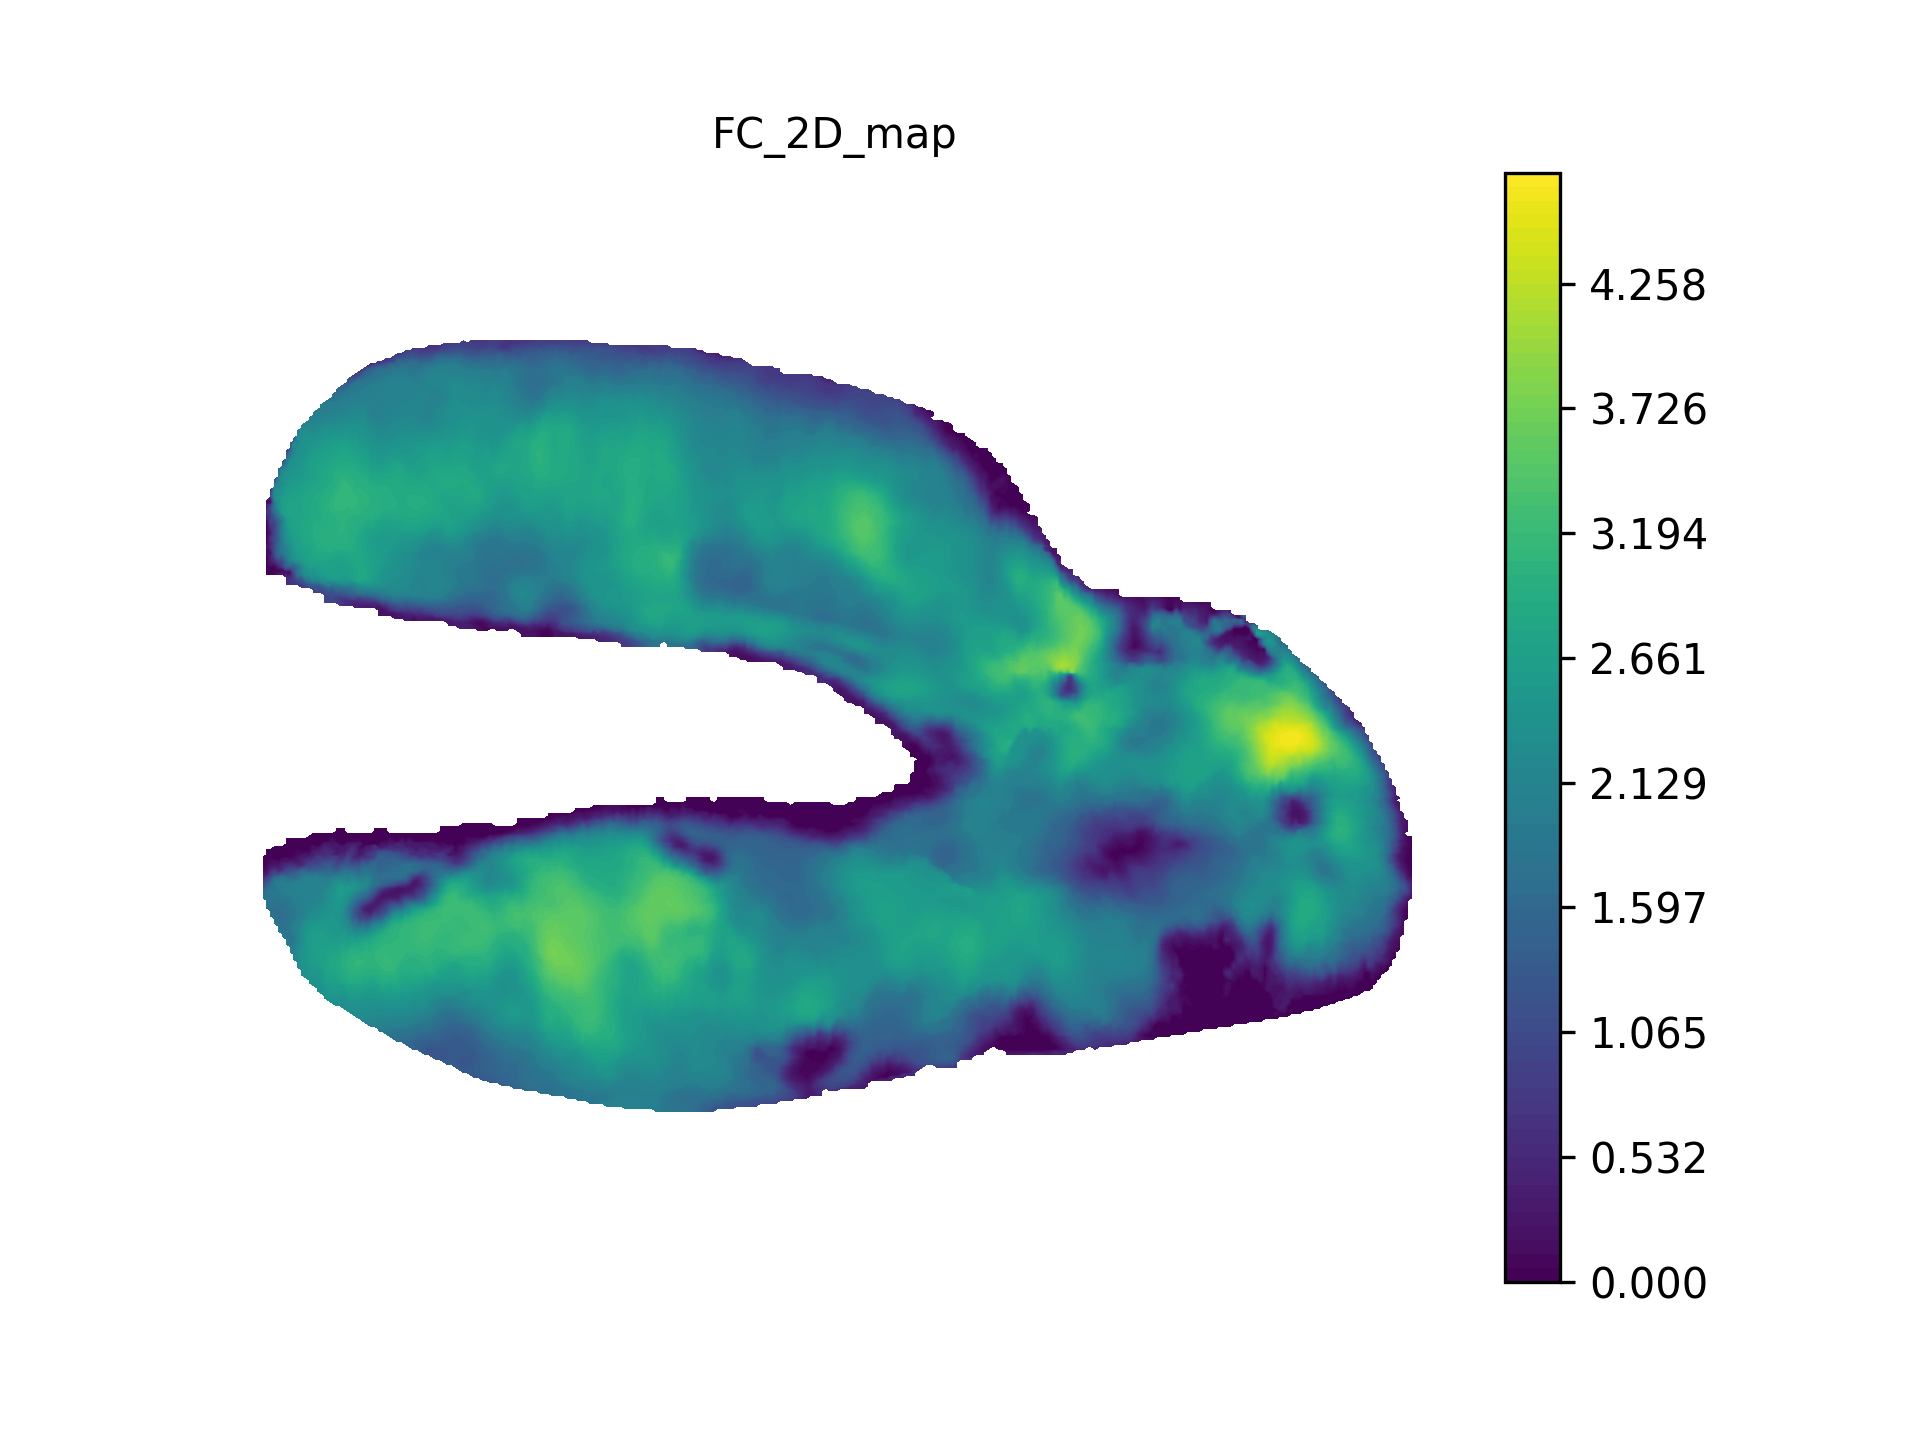


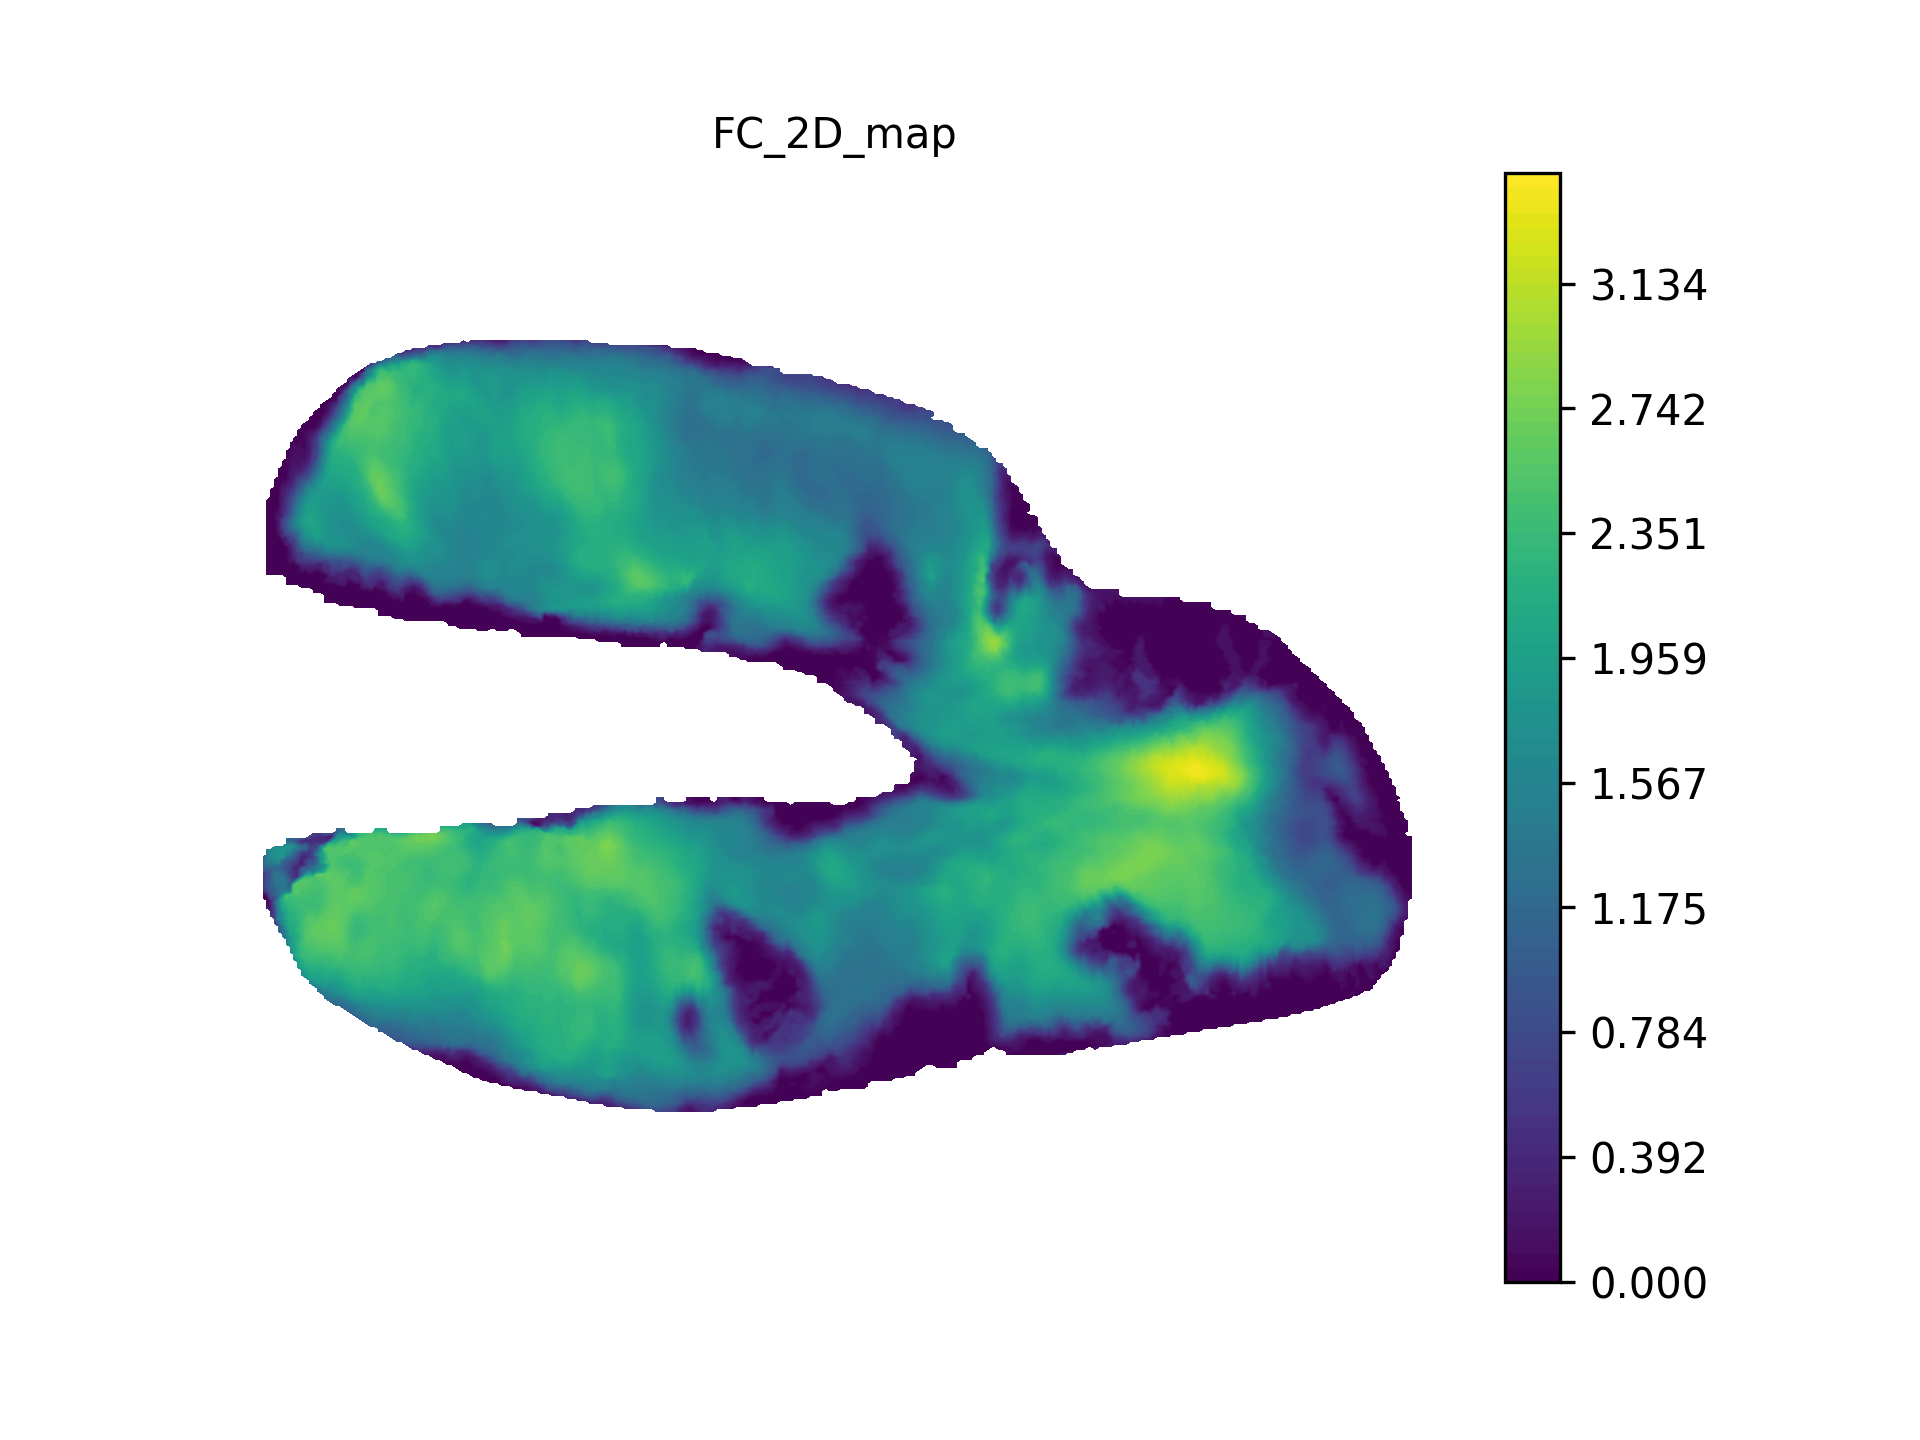


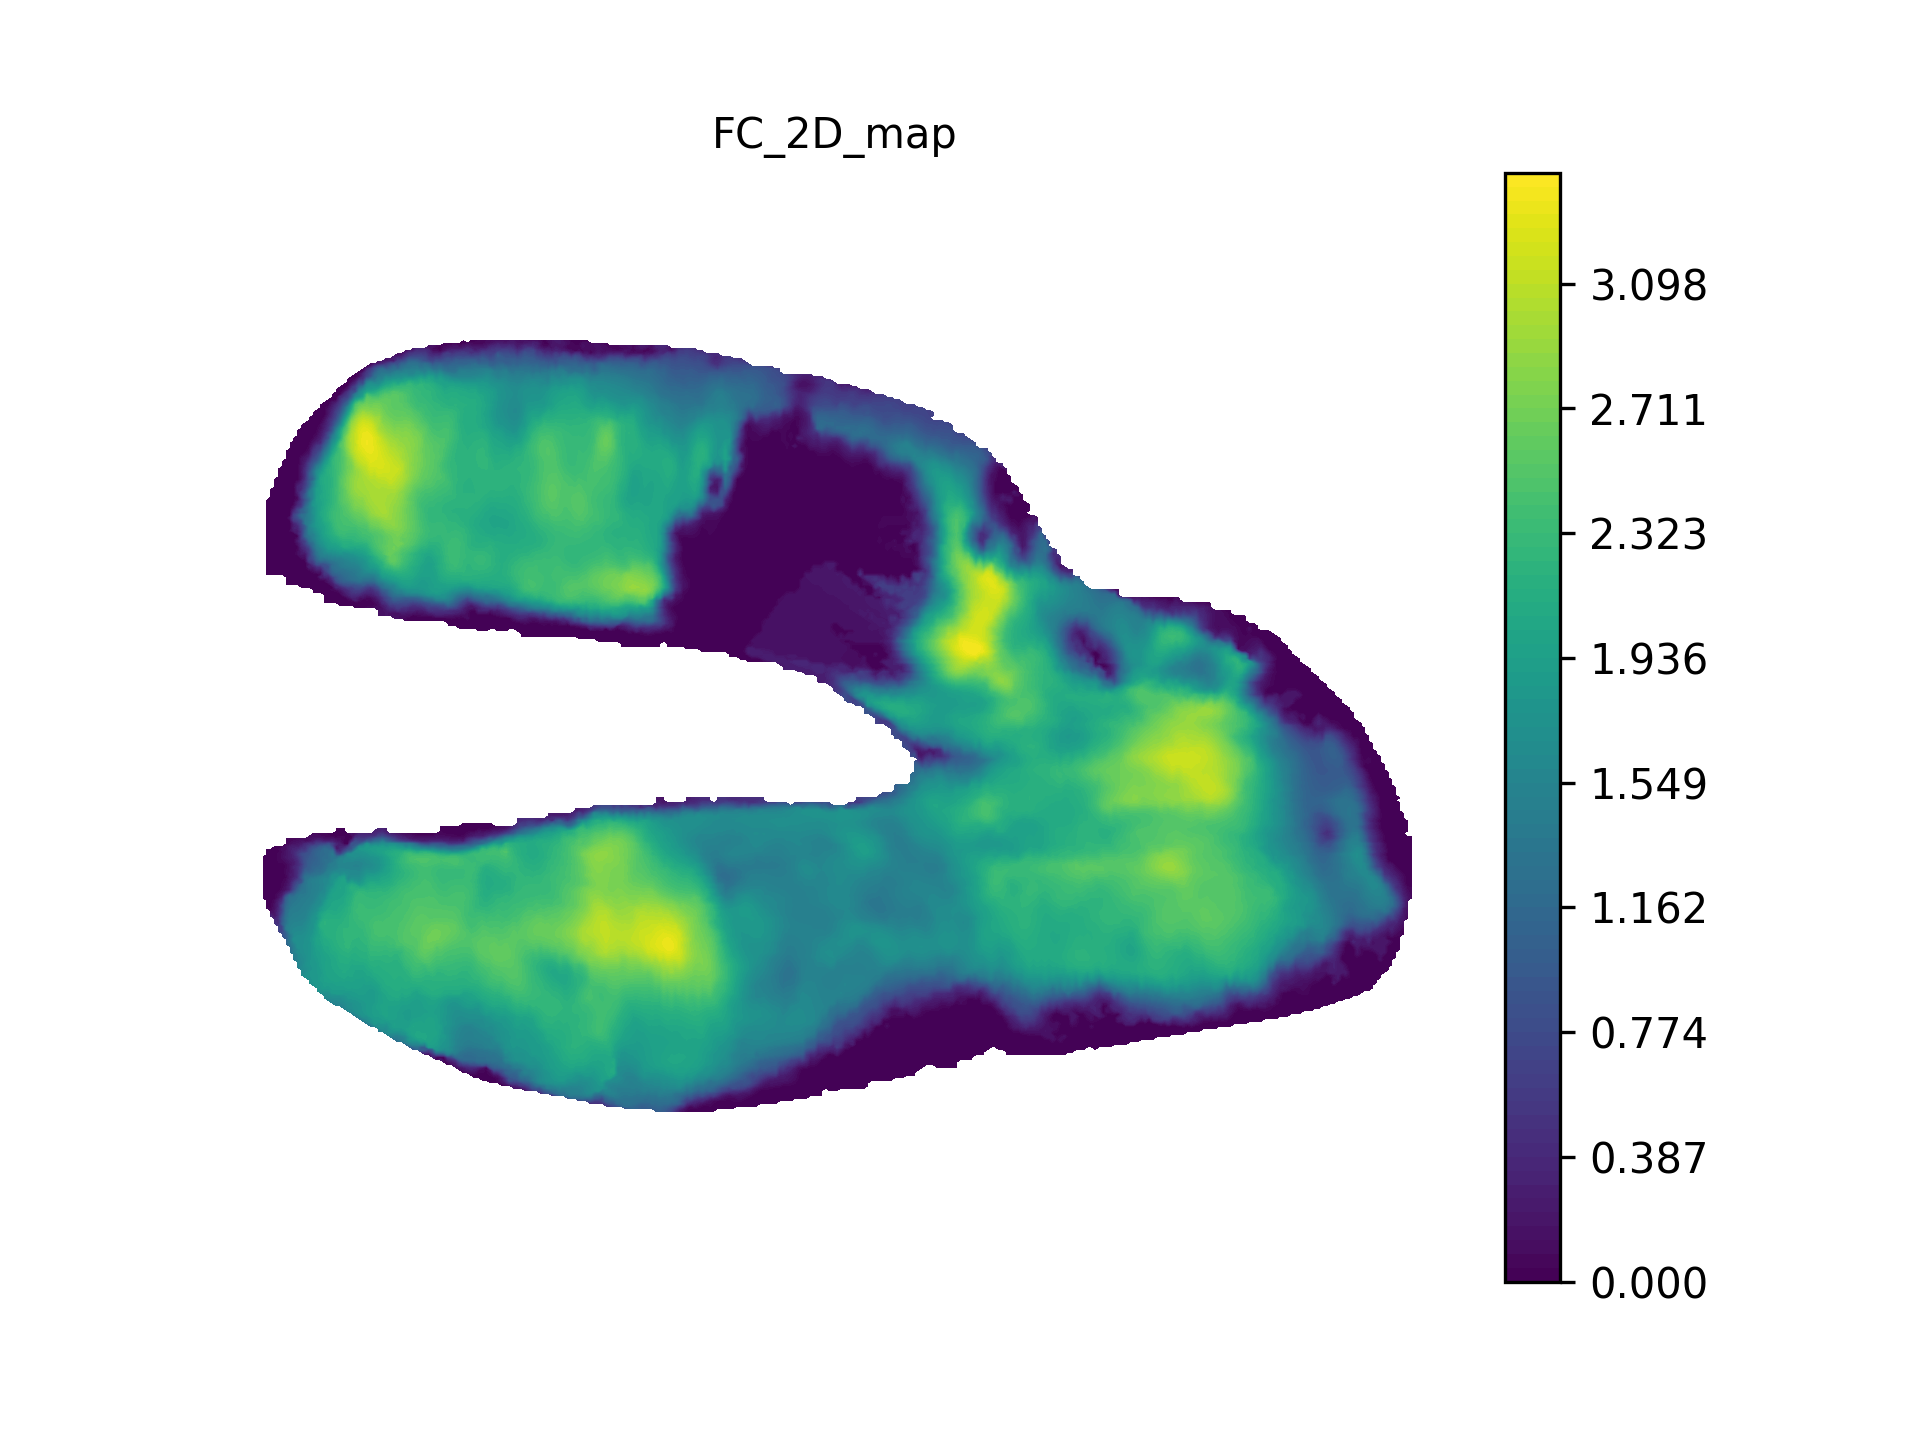

In [31]:
from IPython.display import display, HTML
import base64

IMAGE_SIZE = 300  # pixels

for parent, child_dirs in studies:
    html = f"<h3>{parent}</h3><div style='display: flex; flex-wrap: wrap;'>"
    for child_dir in child_dirs:
        image_path = child_dir / image_file_name
        if image_path.exists():
            with open(image_path, "rb") as img_file:
                data = base64.b64encode(img_file.read()).decode()
            html += f"""
            <div style='margin: 10px; text-align: center;'>
                <img src="data:image/png;base64,{data}" style='max-width: {IMAGE_SIZE}px; max-height: {IMAGE_SIZE}px;'/><br>
                {child_dir.name}
            </div>
            """
        else:
            html += f"""
            <div style='margin: 10px; text-align: center; width: {IMAGE_SIZE}px; height: {IMAGE_SIZE}px; display: flex; align-items: center; justify-content: center; border: 1px solid #ccc;'>
                <span>{child_dir.name} image not found</span>
            </div>
            """
    html += "</div>"
    display(HTML(html))